In [ ]:
%pip install opencv-python==4.6.0.66 matplotlib==3.6.2 imageio==2.23.0




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84
  Attempting uninstall: imageio
    Found existing installation: imageio 2.36.0
    Uninstalling imageio-2.36.0:
      Successfully uninstalled imageio-2.36.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires matplotlib>=3.7.1, but you have matplotlib 3.

In [ ]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.21.0.33.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0



Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstallin

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:

# Ensuring GPU memory growth is set properly
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        try:
            tf.config.experimental.set_memory_growth(device, True)
        except Exception as e:
            print(f"Could not set memory growth for device: {device}, error: {e}")


In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = "data.zip"
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=79d3a5f0-824d-4a21-9b8c-ccfefba3525d
To: /content/data.zip
100%|██████████| 423M/423M [00:04<00:00, 95.4MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [ ]:

vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [ ]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [ ]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [ ]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = os.path.split(path)[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [ ]:

test_path = '.\\data\\s1\\bbal6n.mpg'

In [ ]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

In [ ]:
load_data(tf.convert_to_tensor(test_path))

In [ ]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [ ]:
plt.imshow(frames[35])

In [ ]:
alignments

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

In [ ]:

def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

Creating the data pipeline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# # Added for split
train = data.take(450)
test = data.skip(450)

In [ ]:

len(test)

50

In [ ]:
frames, alignments = data.as_numpy_iterator().next()

TypeError: Invalid shape (75, 46, 140, 1) for image data

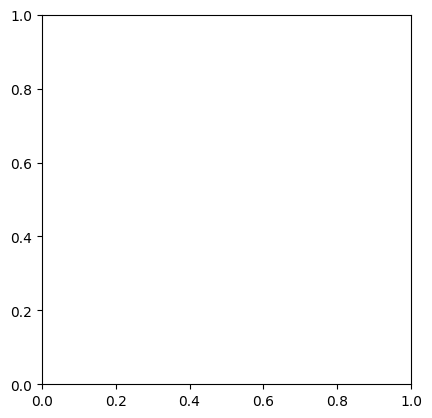

In [ ]:
plt.imshow(frames[0])

In [ ]:
alignments

array([[12,  1, 25, 39, 23,  8,  9, 20,  5, 39,  9, 14, 39, 18, 39, 20,
        23, 15, 39, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [19,  5, 20, 39, 18,  5,  4, 39,  9, 14, 39,  8, 39, 20, 23, 15,
        39, 16, 12,  5,  1, 19,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
len(frames)

2

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:

val = sample.next(); val[0]

array([[[[[1.4258647 ],
          [1.4258647 ],
          [1.389304  ],
          ...,
          [0.29248506],
          [0.2193638 ],
          [0.2193638 ]],

         [[1.4258647 ],
          [1.4258647 ],
          [1.3527434 ],
          ...,
          [0.29248506],
          [0.2193638 ],
          [0.2193638 ]],

         [[1.5355465 ],
          [1.5355465 ],
          [1.4258647 ],
          ...,
          [0.40216696],
          [0.3290457 ],
          [0.3290457 ]],

         ...,

         [[1.0602584 ],
          [1.0236977 ],
          [1.0236977 ],
          ...,
          [0.14624253],
          [0.1096819 ],
          [0.07312126]],

         [[1.0236977 ],
          [1.0236977 ],
          [1.0236977 ],
          ...,
          [0.14624253],
          [0.1096819 ],
          [0.07312126]],

         [[1.0236977 ],
          [1.0236977 ],
          [1.0236977 ],
          ...,
          [0.14624253],
          [0.07312126],
          [0.07312126]]],


        [[[1.3893

In [ ]:
print(val[0][0].shape)

(75, 46, 140, 1)


In [ ]:
import numpy as np
import imageio

# Assuming val[0][0] is a list of frames
frames = val[0][0]

frames_processed = [(frame.reshape(46, 140) * 255).astype(np.uint8) for frame in frames]

# Save as GIF
imageio.mimsave('./animation.gif', frames_processed, fps=10)

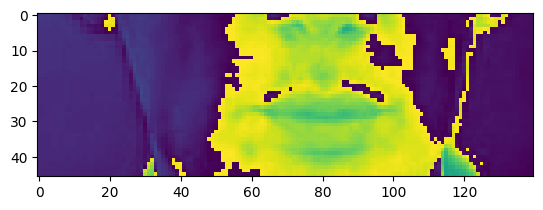

In [ ]:
plt.imshow(val[0][0][30])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin white at g seven again'>

Designing the deep neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:
model = Sequential() #instantialing the model
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same')) #128 3DCNN model
model.add(Activation('relu')) # to give non-linearity to the neural network
model.add(MaxPool3D((1,2,2))) #takes the max values and condense them

model.add(Conv3D(256, 3, padding='same')) #repeat 3 times i.e, 3 layers
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))
print("Shape after TimeDistributed Flatten: ", model.output_shape)
# Adding after the TimeDistributed(Flatten()) layer
model.add(TimeDistributed(Dense(units=128)))  # Reduce dimensionality

# Adjust the Reshape layer to align with the label length (40 here):
model.add(Reshape(target_shape=(-1, 128)))  # You can adjust this shape based on model output


#2LSTM layers
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))
print("Shape after first Bidirectional LSTM: ", model.output_shape)
#specifying bidirectional LSTM
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5)) #regularization, i.e., dropping out 50% of the units

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax')) #softmax activation
#model.add(tf.keras.layers.Dense(40, activation='softmax'))
print("Shape after Dense (final) layer: ", model.output_shape)

Shape after TimeDistributed Flatten:  (None, 75, 6375)
Shape after first Bidirectional LSTM:  (None, 75, 256)
Shape after Dense (final) layer:  (None, 75, 41)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [ ]:
yhat = model.predict(val[0])

1/1 [==============================] - 3s 3s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'6yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy8888'>

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'6yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy8888'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

Setting up training

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:

def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
import tensorflow as tf
import numpy as np

class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset, eval_interval=25) -> None:
        # Store the dataset for re-initialization
        self.dataset = dataset
        # Create an iterator from the dataset
        self.dataset_iterator = dataset.as_numpy_iterator()
        self.eval_interval = eval_interval

    def on_epoch_end(self, epoch, logs=None) -> None:
        if (epoch + 1) % self.eval_interval == 0:  # Check every eval_interval epochs
            try:
                # Try to get the next batch of data
                data = self.dataset_iterator.next()
            except StopIteration:
                # If the dataset is exhausted, re-initialize the iterator
                self.dataset_iterator = self.dataset.as_numpy_iterator()
                data = self.dataset_iterator.next()

            yhat = self.model.predict(data[0])

            # Calculate actual input lengths based on the prediction
            input_lengths = np.ones(yhat.shape[0]) * yhat.shape[1]

            # Decode the predictions using the calculated input lengths
            decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_lengths, greedy=False)[0][0].numpy()

            # Printing accuracy
            correct = 0
            total = len(yhat)
            for x in range(total):
                original = tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8')
                prediction = tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8')
                if original == prediction:
                    correct += 1

            accuracy = correct / total
            print('Original:', original)
            print('Prediction:', prediction)
            print(f"Epoch {epoch+1} - Accuracy: {accuracy*100:.2f}%")
            print('~'*100)


In [ ]:
print(len(train), len(test))


450 50


In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)

In [ ]:
history = model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
450/450 [==============================] - 440s 960ms/step - loss: 87.2190 - val_loss: 70.8097 - lr: 1.0000e-04
Epoch 2/100
450/450 [==============================] - 431s 959ms/step - loss: 72.7109 - val_loss: 67.4654 - lr: 1.0000e-04
Epoch 3/100
450/450 [==============================] - 431s 958ms/step - loss: 69.1334 - val_loss: 65.1670 - lr: 1.0000e-04
Epoch 4/100
450/450 [==============================] - 432s 962ms/step - loss: 66.3653 - val_loss: 62.4271 - lr: 1.0000e-04
Epoch 5/100
450/450 [==============================] - 432s 961ms/step - loss: 64.1964 - val_loss: 59.8102 - lr: 1.0000e-04
Epoch 6/100
450/450 [==============================] - 431s 958ms/step - loss: 62.3229 - val_loss: 58.7379 - lr: 1.0000e-04
Epoch 7/100
450/450 [==============================] - 430s 958ms/step - loss: 60.7302 - val_loss: 57.7420 - lr: 1.0000e-04
Epoch 8/100
450/450 [==============================] - 430s 957ms/step - loss: 59.3696 - val_loss: 55.3000 - lr: 1.0000e-04
Epoch 9/

KeyboardInterrupt: 

In [ ]:
# Function to plot accuracy
def plot_accuracy(history):
    # Extract accuracy values from the history object
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Plotting the training and validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy, label='Training Accuracy')
    plt.plot(validation_accuracy, label='Validation Accuracy')

    # Highlight specific epochs (25th, 50th, 75th, and 100th)
    for epoch in [25, 50]:
        if epoch - 1 < len(training_accuracy):
            plt.scatter(epoch - 1, training_accuracy[epoch - 1], color='red', marker='o')
            plt.scatter(epoch - 1, validation_accuracy[epoch - 1], color='blue', marker='x')
            plt.text(epoch - 1, training_accuracy[epoch - 1], f'Epoch {epoch}', color='red')
            plt.text(epoch - 1, validation_accuracy[epoch - 1], f'Epoch {epoch}', color='blue')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Call the function to plot accuracy
plot_accuracy(history)

NameError: name 'history' is not defined

Preparing for Predictions

In [ ]:
model.load_weights('models/checkpoint')

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_data.next()

(array([[[[[1.2871879 ],
           [1.3651993 ],
           [1.3261937 ],
           ...,
           [0.23403418],
           [0.23403418],
           [0.23403418]],
 
          [[0.50707406],
           [0.8581253 ],
           [1.1701709 ],
           ...,
           [0.23403418],
           [0.23403418],
           [0.23403418]],
 
          [[0.62409115],
           [1.1311651 ],
           [1.3261937 ],
           ...,
           [0.19502848],
           [0.19502848],
           [0.19502848]],
 
          ...,
 
          [[1.0921595 ],
           [1.0921595 ],
           [1.0921595 ],
           ...,
           [0.0390057 ],
           [0.0390057 ],
           [0.0390057 ]],
 
          [[1.0531538 ],
           [1.0531538 ],
           [1.0531538 ],
           ...,
           [0.0390057 ],
           [0.0390057 ],
           [0.0390057 ]],
 
          [[1.0531538 ],
           [1.0531538 ],
           [1.0531538 ],
           ...,
           [0.0390057 ],
           [0.0390057 

In [ ]:
sample = test_data.next()

In [ ]:

yhat = model.predict(sample[0])

1/1 [==============================] - 0s 38ms/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay green at f seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set white in u five soon'>]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'lay green at seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set white in ive soon'>]

Testing on a new video

In [ ]:
sample = load_data(tf.convert_to_tensor('.data/s1/bbaf2n.mpg'))

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>]

In [ ]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 0s 32ms/step


In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at wo now'>]